#  [ 資料清理數據前處理 ]

- Pandas 處理最常用的資料格式, 我們稱為 DataFrame
- 為了將類別或是文字的資料轉換成數字讓程式能夠更好的理解及運算，故使用以下編碼方式處理。
 -  **Label encoding**：
   - 使用時機通常是該資料的不同類別是有序的，例如該資料是年齡分組，類別有小孩、年輕人、老⼈，表示為 0, 1, 2 是合理的，因為年齡上老人 > 年輕人、年輕人 > 小孩 
   - 把每個類別 mapping 到某個整數，不會增加新欄位 
 - **One Hot encoding** : 
   - 使⽤用時機通常是該資料的不同類別是無序的， 例如國家
   - 為每個類別新增一個欄位，用 0/1 表示是否
- 轉換器（Transformer）
 - 转换器用于数据预处理和数据转换，主要是三个方法：
   - fit()：训练算法，设置内部参数。
   - transform()：数据转换。
   - fit_transform()：合并fit和transform两个方法。
- 離群值（Outliers）
 - 為何會有 outliers, 常見的 outlier 原因：
   - 未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
   - 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

In [2]:
# 載入所需套件
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

# 設定 data_path
dir_data = './data/'

# 用 pd.read_csv 來讀取資料 
# os.path.join()： 将多个路径组合后返回
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

HomeCredit_train = pd.read_csv(f_app_train)
HomeCredit_test = pd.read_csv(f_app_test)

In [3]:
# 用 .head() 這個函數來觀察前 5 row 資料
HomeCredit_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 截取部分資料
HomeCredit_train.iloc[:10, 0:5]  # 前 10 row 以及前 5 個 column

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR
0,100002,1,Cash loans,M,N
1,100003,0,Cash loans,F,N
2,100004,0,Revolving loans,M,Y
3,100006,0,Cash loans,F,N
4,100007,0,Cash loans,M,N
5,100008,0,Cash loans,M,N
6,100009,0,Cash loans,F,Y
7,100010,0,Cash loans,M,Y
8,100011,0,Cash loans,F,N
9,100012,0,Revolving loans,M,N


In [5]:
#取'TARGET'行所有列
HomeCredit_train.loc[:,['TARGET']] 

,TARGET
0,1
1,0
2,0
3,0
4,0
...,...
307506,0
307507,0
307508,0
307509,1


In [6]:
# 檢視資料中各個欄位類型的數量
HomeCredit_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [7]:
# 檢視資料中類別型欄位各自類別的數量
HomeCredit_train.select_dtypes(include=["object"]).apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [8]:
# label encoding
# Create a label encoder object
le = LabelEncoder()
le_count = 0
'''
# Iterate through the columns
for column in HomeCredit_train:
    if HomeCredit_train[column].dtype =='object':
        if len(list(HomeCredit_train[column].unique())) <= 2:  #np.unique() 去除矩陣重複數字並輸出
            # Train on the training data
            le.fit(HomeCredit_train[column])
            # Transform both training and testing data
            HomeCredit_train[column] = le.transform(HomeCredit_train[column])
            HomeCredit_test[column] = le.transform(HomeCredit_test[column])
            
            le_count += 1
print('%d columns were label encoded.' % le_count)       
'''

"\n# Iterate through the columns\nfor column in HomeCredit_train:\n    if HomeCredit_train[column].dtype =='object':\n        if len(list(HomeCredit_train[column].unique())) <= 2:  #np.unique() 去除矩陣重複數字並輸出\n            # Train on the training data\n            le.fit(HomeCredit_train[column])\n            # Transform both training and testing data\n            HomeCredit_train[column] = le.transform(HomeCredit_train[column])\n            HomeCredit_test[column] = le.transform(HomeCredit_test[column])\n            \n            le_count += 1\nprint('%d columns were label encoded.' % le_count)       \n"

In [9]:
# One Hot encoding
# get_dummies 是利用 pandas 实现 one hot encode 的方式
'''
HomeCredit_train = pd.get_dummies(HomeCredit_train)
HomeCredit_test = pd.get_dummies(HomeCredit_test)

print(HomeCredit_train['CODE_GENDER_F'].head())
print(HomeCredit_train['CODE_GENDER_M'].head())
print(HomeCredit_train['NAME_EDUCATION_TYPE_Academic degree'].head())
'''

"\nHomeCredit_train = pd.get_dummies(HomeCredit_train)\nHomeCredit_test = pd.get_dummies(HomeCredit_test)\n\nprint(HomeCredit_train['CODE_GENDER_F'].head())\nprint(HomeCredit_train['CODE_GENDER_M'].head())\nprint(HomeCredit_train['NAME_EDUCATION_TYPE_Academic degree'].head())\n"

In [10]:
# 訓練資料需要 train_X, train_Y / 預測輸出需要 ids(識別每個預測值), test_X
# 在此先抽離出 train_Y 與 ids, 而先將 train_X, test_X 該有的資料合併成 df, 先作特徵工程
train_Y = np.log1p(HomeCredit_train['TARGET']) # [log1p] 數據平滑處理，使其更加服從高斯分佈
ids = HomeCredit_test['SK_ID_CURR']
#HomeCredit_train = HomeCredit_train.drop(['SK_ID_CURR', 'TARGET'] , axis=1) # [drop] 刪除一行或一列 axis=1(column)
#HomeCredit_test = HomeCredit_test.drop(['SK_ID_CURR'] , axis=1)
df = pd.concat([HomeCredit_train,HomeCredit_test]) # 合併
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0.0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0.0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# 秀出資料欄位的類型, 與對應的數量
# df.dtypes : 轉成以欄位為 index, 類別(type)為 value 的 DataFrame
# .reset_index() : 預設是將原本的 index 轉成一個新的欄位, 如果不須保留 index, 則通常會寫成 .reset_index(drop=True)
dtype_df = df.dtypes.reset_index() 
dtype_df.columns = ["Count", "Column Type"]
dtype_df = dtype_df.groupby("Column Type").aggregate('count').reset_index()
dtype_df

,Column Type,Count
0,int64,40
1,float64,66
2,object,16


In [12]:
# 確定只有 int64, float64, object 三種類型後對欄位名稱執行迴圈, 分別將欄位名稱存於三個 list 中
int_features = []
float_features = []
object_features = []
# .dtypes(欄位類型), .columns(欄位名稱) 是 DataFrame 提供的兩個方法
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64':
        float_features.append(feature)
    elif dtype == 'int64':
        int_features.append(feature)
    else:
        object_features.append(feature)
# 這邊採用的寫法稱為 f-string, 是 Python 3.6.2 以後版本才出現的
# 如果無法執行, 則需要更新到這個版本之後, 或自行將程式改寫為 str.format 形式
print("Integer Features :" + f'{len(int_features)}')
print("Float Features :" + f'{len(float_features)}')
print("Object Features :" + f'{len(object_features)}')

Integer Features :40
Float Features :66
Object Features :16


In [13]:
#這樣就可以單獨秀出特定類型的欄位集合, 方便做後續的特徵工程處理
df[int_features].head()

,SK_ID_CURR,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,0,-9461,-637,-2120,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,-16765,-1188,-291,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,-19046,-225,-2531,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,-19005,-3039,-2437,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,-19932,-3038,-3458,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


客戶申請貸款時的車齡 : 
count    104582.000000
mean         12.061091
std          11.944812
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64


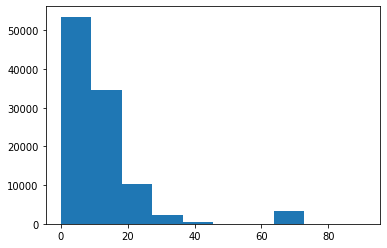

客戶申請貸款時的年齡 : 
count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64
 


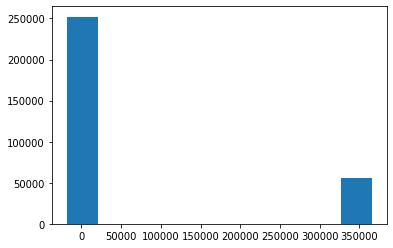

False    252137
True      55374
Name: DAYS_EMPLOYED_ANOM, dtype: int64


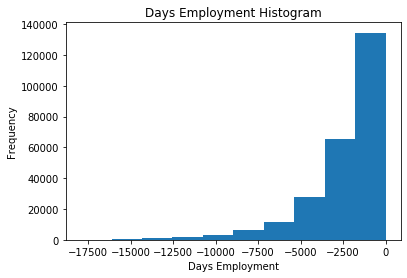

In [14]:
# 檢視不同欄位是否有離群值

# 檢查 OWN_CAR_AGE: 貸款人的車齡
print("客戶申請貸款時的車齡 : ")
print(HomeCredit_train['OWN_CAR_AGE'].describe())
plt.hist(HomeCredit_train[~HomeCredit_train.OWN_CAR_AGE.isnull()]['OWN_CAR_AGE'])
plt.show()

# DAYS_BIRTH: 客戶申請貸款時的年齡
print("客戶申請貸款時的年齡 : ")
print((HomeCredit_train['DAYS_BIRTH']/(-365)).describe())
print(" ")
# DAYS_EMPLOYaED: 申請貸款前，申請人已在現職工作的時間
(HomeCredit_train['DAYS_EMPLOYED'] / 365).describe()
plt.hist(HomeCredit_train['DAYS_EMPLOYED'])
plt.show()

# 新增一個欄位: DAYS_EMPLOYED_ANOM 來標記 DAYS_EMPLOYED 是否異常
HomeCredit_train['DAYS_EMPLOYED_ANOM'] = HomeCredit_train["DAYS_EMPLOYED"] == 365243
print(HomeCredit_train['DAYS_EMPLOYED_ANOM'].value_counts())
# 這邊我們用 nan 將異常值取代
HomeCredit_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
HomeCredit_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');



In [15]:
# 觀察去除離群值的影響
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print("數值型欄位數量 : "+f'{len(num_features)}')

數值型欄位數量 : 106


In [16]:
# 削減文字型欄位, 只剩數值型欄位
df = df[num_features]
df = df.fillna(0) #使用特定值取代所有 NAN
MMEncoder = MinMaxScaler()
df.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1.0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0.0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0.0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0.0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0.0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


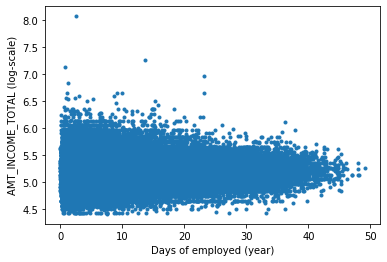

Correlation: nan


In [17]:
# 顯示 客戶收入 與 受雇天數 的散佈圖
# 由於其他天數都是負值, 且聘僱日數不太可能是 365243 (大約 1000年), 算是異常數字 
# 因此我們推斷這份資料中, DAYS_EMPLOYED 的欄位如果是 365243, 應該是對應到空缺值, 繪圖時應該予以忽略
sub_df = HomeCredit_train[HomeCredit_train['DAYS_EMPLOYED'] != 365243]

# 如果直接畫散布圖 - 看不出任何趨勢或形態
# 通常可以對數值範圍較大的取 log: 發現雖然沒有相關，但是受雇越久的人，AMT_INCOME_TOTAL 的 variance 越小
plt.plot(sub_df['DAYS_EMPLOYED'] / (-365), np.log10(sub_df['AMT_INCOME_TOTAL'] ), '.')
plt.xlabel('Days of employed (year)')
plt.ylabel('AMT_INCOME_TOTAL (log-scale)')
plt.show()
corr = np.corrcoef(sub_df['DAYS_EMPLOYED'] / (-365), np.log10(sub_df['AMT_INCOME_TOTAL']))
print("Correlation: %.4f" % (corr[0][1]))

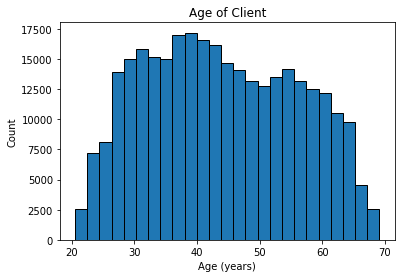

In [18]:
# 分布圖包含 KDE(Kenel Density Estimation) 曲線, 以及 Bar(區間長條圖)

# 資料整理 ( 'DAYS_BIRTH'全部取絕對值 ) ( 收入取 log ) 
HomeCredit_train['DAYS_BIRTH'] = abs(HomeCredit_train['DAYS_BIRTH'])
HomeCredit_train['AMT_INCOME_TOTAL'] = np.log10(HomeCredit_train['AMT_INCOME_TOTAL'])
# 以 年紀 繪製分布圖
plt.hist(HomeCredit_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');
plt.show()

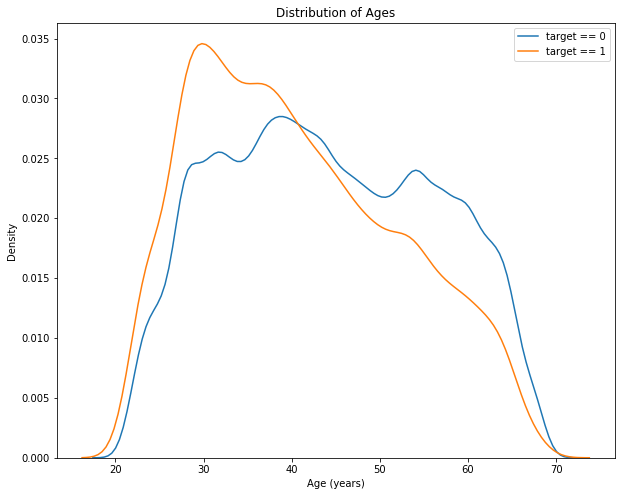

In [19]:
# 設定繪圖區域的長與寬
plt.figure(figsize = (10, 8))

# KDE plot: 會準時還貸者 - 下圖 藍線
sns.kdeplot(HomeCredit_train.loc[HomeCredit_train['TARGET'] == 0, 'DAYS_BIRTH']/365 , label = 'target == 0')
# KDE plot: 不會準時還貸者 - 下圖 橘線
sns.kdeplot(HomeCredit_train.loc[HomeCredit_train['TARGET'] == 1, 'DAYS_BIRTH']/365 , label = 'target == 1')

# 設定標題與 X, y 軸的說明
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');
plt.show()

                TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH
TARGET        1.000000     -0.155317     -0.160472     -0.178919   -0.078239
EXT_SOURCE_1 -0.155317      1.000000      0.213982      0.186846    0.600610
EXT_SOURCE_2 -0.160472      0.213982      1.000000      0.109167    0.091996
EXT_SOURCE_3 -0.178919      0.186846      0.109167      1.000000    0.205478
DAYS_BIRTH   -0.078239      0.600610      0.091996      0.205478    1.000000
 


Text(0.5, 1, 'Correlation Heatmap')

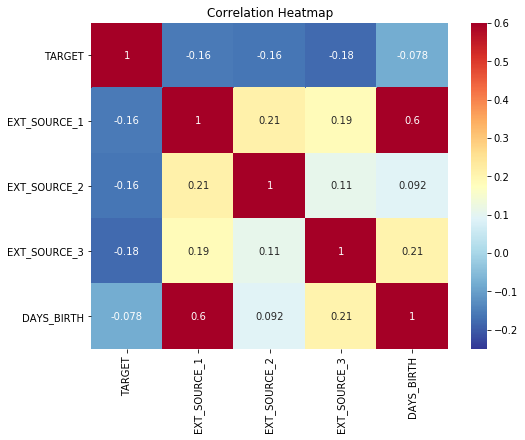

In [25]:
# 將表格型的圖進行視覺化, 常見的 Heatmap
# 取出 EXT_SOURCE 的幾項變數並檢驗其相關性
HomeCredit_train['DAYS_BIRTH'] = abs(HomeCredit_train['DAYS_BIRTH'])
ext_data = HomeCredit_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
print(ext_data_corrs)
print(" ")
plt.figure(figsize = (8, 6))
# 繪製相關係數 (correlations) 的 Heatmap
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap')